<a href="https://colab.research.google.com/github/luisfranc123/Tutorials_Statistics_Numerical_Analysis/blob/main/Numerical_Methods/Chapter20_Numerical_Differentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**20. NUMERICAL DIFFERENTIATION**
---
**Textbook**: Python Programming and Numerical Methods

####**20.1 NUMERICAL DIFFERENTIATION PROBLEM STATEMENT**

A **numerical grid** can be defined as an evenly set of points over the domain of a function (i.e., the independent variable), over some interval. The **spacing** or **step size** of a numerical grid is the distance between adjacent points on the grid. For the purpose of this text, if $x$ is a numberical grid, then $x_j$ is the $j$th point in the numerical grid, and $h$ is the spacing between $x_{j-1}$ and $x_j$.

There are several functions in Python that can be used to generate numerical grids. For numerical grids in one dimension, it is sufficient to use the `linspace` function.

In Python, a function $f(x)$ can be represented over an interval by computing its value on a grid. Although the function itself may be continouous, this **discrete** or **discretized** representation is useful for numerical calculation and corresponds to datasets that may be aquired in engineering and science practice. Specifically, the function value may only be known at discrete points. For example, a temparature sensor may deliver temperature versus time pairs at regular time intervals. Although temperature is a smooth function of time, the sensor only provides values at discrete time intervals; in this particular case, the underlying function would not even be known.

Whether $f$ is an analytic function or a discrete representation of one, we would like to derive methods of approximating the derivative of $f$ over a numerical grid and determine its accuracy.



####**20.2 USING FINITE DIFFERENCE TO APPROXIMATE DERIVATIVES**

The derivative $f^{'}(x)$ os a function $f(x)$ at the point $x=a$ is defined as

$$f^{'}(a) = \lim_{x \to a}\frac{f(x)-f(a)}{x-a}$$

The derivative at $x = a$ is the slope at this point. In **"finite difference"** approximations of this slope, one uses values of the function in a neightborhod of the point $x=a$ to achieve the goal.

The **forward difference** estimates the slope of the function at $x_j$ using the line that connects $(x_j, f(x_j))$ and $(x_{j+1}, f(x_{j+1}))$:

$$f^{'}(x_j) = \frac{f(x_{j+1})-f(x_j)}{x_{j+1}-x_j}.$$

The **backward difference** estimates the slope of the function at $x_j$ using the line that connects $(x_{j-1}, f(x_{j-1}))$ and $(x_j, f(x_j))$:

$$f^{'}(x_j) = \frac{f(x_j)-f(x_{j-1})}{x_j-x_{j-1}}.$$

The **central difference** estimates the slope of the function at $x_j$ using the line that connects $(x_{j-1}, f(x_{j-1}))$ and $(x_{j+1}, f(x_{j+1}))$:

$$f^{'}(x_j) = \frac{f(x_{j+1})-f(x_{j-1})}{x_{j+1}-x_{j-1}}.$$


![finite differnce](https://pythonnumericalmethods.studentorg.berkeley.edu/_images/20.02.01-Finite-difference.png)

####**20.2.1 USING FINITE DIFFERENCE TO APPROXIMATE DERIVATIVES WITH TAYLOR SERIES**

To derive an approximation for the derivative of $f$, we return to the Taylor series. For an arbitrary function $f(x)$, the taylor series of $f$ around $a = x_j$ is

$$f(x) = \frac{f(x_j)(x - x_j)^0}{0!} + \frac{f^{'}(x_j)(x - x_j)^1}{1!} + \frac{f^{''}(x_j)(x - x_j)^2}{2!} + \frac{f^{'''}(x_j)(x - x_j)^3}{3!} + ...$$

If $x$ is on a grid of points with spacing $h$, we can compute the Taylor series at $x = x_{j+1}$ to obtain

$$f(x_{j+1}) = \frac{f(x_j)(x_{j+1} - x_j)^0}{0!} + \frac{f^{'}(x_j)(x_{j+1} - x_j)^1}{1!} + \frac{f^{''}(x_j)(x_{j+1} - x_j)^2}{2!} + \frac{f^{'''}(x_j)(x_{j+1} - x_j)^3}{3!} + ...$$

Substituting $h = x_{j+1} - x_j$ and solving for $f^{'}(x_j)$ gives the equation

$$f^{'}(x_j)=\frac{f(x_{j+1})-f(x_j)}{h}+(-\frac{f^{''}(x_j)h}{2!} - \frac{f^{'''}(x_j)h^2}{3!} - ...).$$

The terms that are in parentheseses, $-\frac{f^{''}(x_j)h}{2!} - \frac{f^{'''}(x_j)h^2}{3!} - ...$, are called **higher order terms** of $h$. The higher order terms can be re-written as

$$-\frac{f^{''}(x_j)h}{2!} - \frac{f^{'''}(x_j)h^2}{3!} - ...=h(\alpha+\epsilon(h)),$$

where $\alpha$ is some constant, and $\epsilon(h)$ is a function of $h$ that goes to zero as $h$ goes to zero. We use the abbreviation $"O(h)"$ for $h(\alpha+\epsilon(h))$, and in general, we use the abbreviation $"O(h^p)"$ to denote $h^p(\alpha+\epsilon(h)).$

Substituting $O(h)$ into the previous equatio gives

$$f^{'}(x_j)=\frac{f(x_{j+1})-f(x_j)}{h} + O(h).$$

This gives the **forward difference** formula for approximating derivatives as

$$f^{'}(x_j)\approx\frac{f(x_{j+1})-f(x_j)}{h},$$

and we denote this formula as $O(h)$.

Intuitively, the forward and backward difference formulas for the derivative ar $x_j$ are just the slopes between the point at $x_j$ and the points $x_{j+1}$ and $x_{j-1}$, respectively.

We can construct an improved approximation of the derivative by a clever manipulation of Taylor series terms taken at different points. To illustrate, we can compute the Taylor series around $a = x_j$ at both $x_{j+1}$ and $x_{j-1}$. Written out, these equations are

$$f(x_{j+1}) = f(x_j) + f^{'}(x_j)h+\frac{1}{2}f^{''}(x_j)h^2 + \frac{1}{6}f^{'''}(x_j)h^3 + ...$$

and

$$f(x_{j-1}) = f(x_j) - f^{'}(x_j)h + \frac{1}{2}f^{''}(x_j)h^2 - \frac{1}{6}f^{'''}(x_j)h^3 + ...$$

Subtracting the formulas above gives

$$f(x_{j+1})- f(x_{j-1}) = 2f^{'}(x_j)h + \frac{2}{3}f^{'''}(x_j)h^3 + ...,$$

which, when solved for $f^{'}(x_j)$, gives the **central difference** formula

$$f^{'}(x_j)\approx\frac{f(x_{j+1}) - f(x_{j-1})}{2h}.$$

Because of how we subtracted the two equations, the $h$ terms canceled out; therefore, the central difference formula is $O(h^2)$, even though it requires the same amount of computational effort as the forward and backward difference formulas! Thus the central difference formula gets an extra order of accuracy for free. In general, formulas that utilize symmetric points around $x_j$, for example $x_{j+1}$ and $x_{j-1}$, have better accuracy than asymmetric ones, such as the forward and backward difference
formulas.

<img src = "https://pythonnumericalmethods.studentorg.berkeley.edu/_images/20.02.01-Forward_difference.png" width = "400" height = "300">


**Tip!** Python has a command that can be used to compute finite differences directly: for a vector $f$, the command `d = np.diff(f)` produces and array `d` in which the entries are the differences of the adjacent elements in the initial array $f$. In other words, $d(i) = f(i+1) - f(i)$.

**Warning!** When using the command `np.diff`, the size of the output is one less than the size of the input since it needs two arguments to produce a difference.



**Example:** Consider the function $f(x) = cos(x)$. We know that the derivative of $cos(x)$ is $-sin(x)$. Although in practice we may not know the underlying function we are finding the derivative for, we use the simple example to illustrate the aformentioned numerical differentiation methods and their accuracy. The following code computes the derivatives numerically.

In [ ]:
h = 0.1
x = np.arange(0, 2*np.pi, h)
x_diff = x[:-1]
print(x)
print("-----------")
print(x_diff)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2]
-----------
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1]


In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

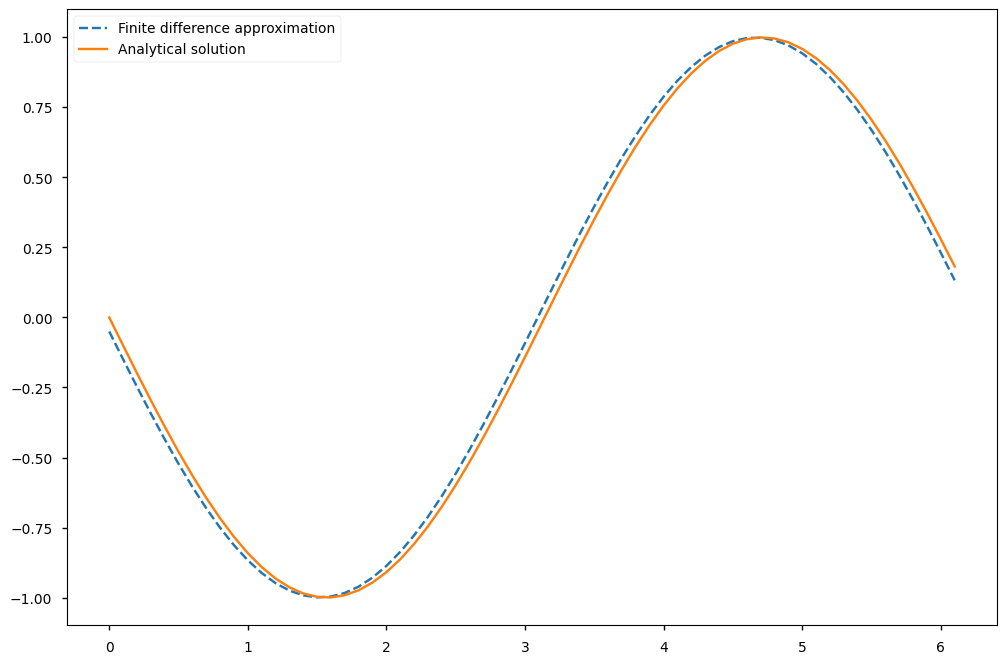

max error = 0.04998


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-notebook')

# Step size
h = 0.1
# defined grid
x = np.arange(0, 2*np.pi, h)
# compute function
y = np.cos(x)

# compute vector of forward differences
forward_diff = np.diff(y)/h
# compute corresponding grid
x_diff = x[:-1]
# compute exact solution
exact_solution = -np.sin(x_diff)

# plot solution
plt.figure(figsize = (12, 8))
plt.plot(x_diff, forward_diff, "--",
         label = "Finite difference approximation")
plt.plot(x_diff, exact_solution, label = "Analytical solution")
plt.legend()
plt.show()

# Compute max error between
# numerical derivative and analytical solution
max_error = max(abs(exact_solution - forward_diff))
print(f"max error = {max_error:.5f}")

As the above ﬁgure shows, there is a small offset between the two curves, which results from the numerical error in the evaluation of the numerical derivatives. The maximal error between the two numerical results is of the order 0.05 and expected to decrease with the size of the step.
As illustrated in the previous example, the ﬁnite difference scheme contains a numerical error due to the approximation of the derivative. This difference decreases with the size of the discretization step, which is illustrated in the following example.

**Example**: The following code computes the numerical derivative of $f(x) = cos(x)$ using the forward-difference formula for decreasing step size, $h$. It then plots the maximum error between the approximated derivative and the true derivative versus $h$ as shown in the generated figure.

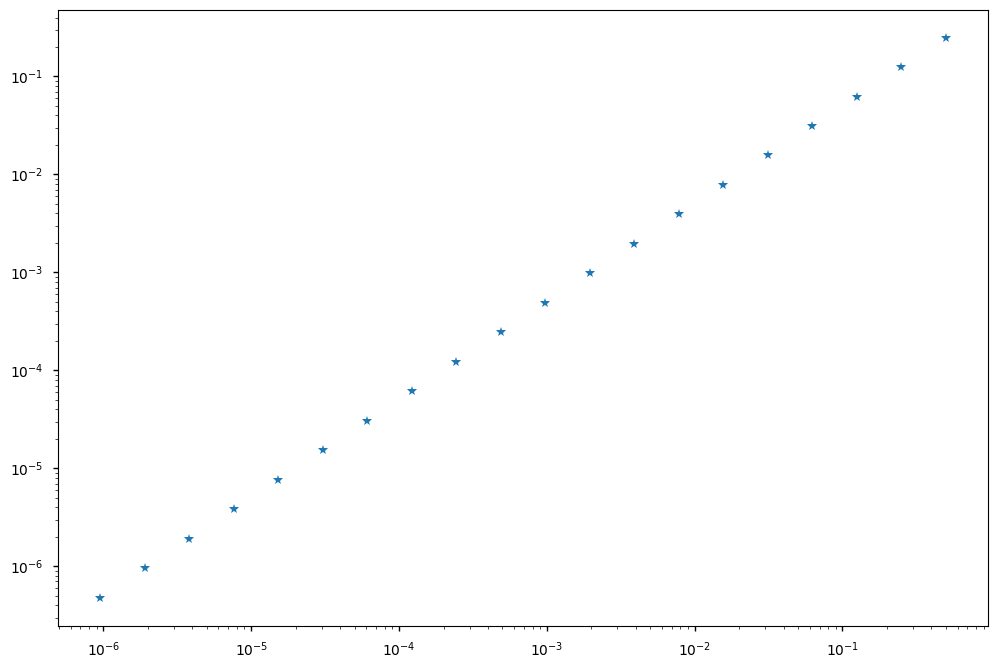

In [ ]:
# define step size
h = 1
# define number of iterations to perform
iterations = 20
# list to store our step sizes
step_size = []
# list to store max error for each step size
max_error = []

for i in range(iterations):
  # halve the step size
  h /= 2
  # store this step size
  step_size.append(h)
  # compute new grid
  x = np.arange(0, 2*np.pi, h)
  # compute function value at grid
  y = np.cos(x)
  # compute vector of forward differences
  forward_diff = np.diff(y)/h
  # compute corresponding grid
  x_diff = x[:-1]
  # compute analytical solution
  exact_solution = -np.sin(x_diff)

  # compute max error between
  # numerical and analytical solution
  max_error.append(max(abs(exact_solution - forward_diff)))

# produce log-log plot of max error versus step size
plt.figure(figsize = (12, 8))
plt.loglog(step_size, max_error, "*")
plt.show()

The slope of the line in log-log space is 1; therefore, the error is proportional to $h^1$, which means that, as expected, the forward-difference formula is $O(h)$.

####**20.3 APPRXIMATING OF HIGHER ORDER DERIVATIVES**

It also possible to use the Taylor series to approximate higher-order derivatives (e.g., $f^{''}(x_j), f^{'''}(x_j)$, etc.). For example, taking the Taylor series around $a = x_j$ and then computing it at $x = x_{j-1}$ and $x_{j+1}$ gives

$$f(x_{j-1}) = f(x_j) - hf^{'}(x_j) + \frac{h^2f^{''}(x_j)}{2} - \frac{h^3f^{'''}(x_j)}{6} + ...$$

and

$$f(x_{j+1}) = f(x_j) + hf^{'}(x_j) + \frac{h^2f^{''}(x_j)}{2} + \frac{h^3f^{'''}(x_j)}{6} + ...$$

If we add these two equqtions together, we get

$$f(x_{j-1}) + f(x_{j+1}) = 2f(x_j) + h^2f^{''}(x_j) + \frac{h^4f^{''''}(x_j)}{24} + ...,$$

and, with some rearrangement, this gives the aproximation

$$f^{''}(x_j)\approx\frac{f(x_{j+1})-2f(x_j)+f(x_{j-1})}{h^2},$$

which is $O(h^2)$.

####**20.4 NUMERICAL DIFFERENTIATION WITH NOISE**

As stated earlier, sometimes $f$ is given as a vector where $f$ is the corresponding function value for independent data values in another vector $x$, which is gridded. Sometimes data can be contaminated with **noise**, meaning its value is off by a small amount from what it would be if it were computed from a pure mathematical function. This can often occur in engineering due to inaccuracies in measurement devices or the data itself can be slightly modified by perturbations outside the system of interest. For insance, you may be trying to listen to your friend talk in a crowded room. The signal $f$ might be te intensity and tonal values in your friend's speech; however, because the room is crowded, noise from other conversations is heard along with your friend's speech, and he/she becomes difficult to understand. To illustrate this point, we numerically compute the derivative of a simple cosine wave corrupted by a small sin wave. Consider the folowing two functions:

$$f(x) = cos(x)$$

and

$$f_{\epsilon, \omega}(x)=cos(x) + \epsilon sin(\omega x)$$

where $0<\epsilon<<1$ is a very small number, and $\omega$ is a large number. When $\epsilon$ is small, it is clear that $f\cong f_{\epsilon, \omega}$. To illustrate this point, we plot $f_{\epsilon, \omega}(x)$ for $\epsilon = 0.01$ and $\omega = 100$, and we can see it is very close to $f(x)$, as shown in the following figure.


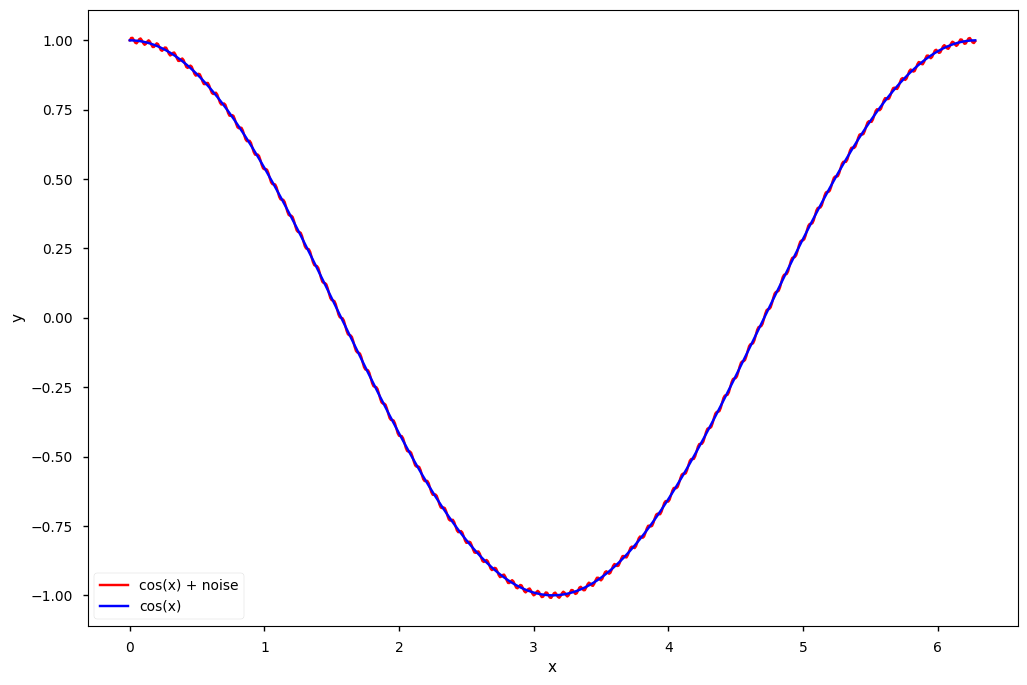

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-notebook")

x = np.arange(0, 2*np.pi, 0.01)
# compute function
omega = 100
epsilon = 0.01

y = np.cos(x)
y_noise = y + epsilon*np.sin(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, "r-", label = "cos(x) + noise")
plt.plot(x, y, "b-", label = "cos(x)")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

The derivatives of our two test functions are

$$f^{'}(x)=-sin(x)$$

and

$$f^{'}_{\epsilon, \omega}(x)=-sin(x) + \epsilon \omega⋅ cos(\omega x)$$

Since $\epsilon\omega$ may not be sall whe $\omega$ is large, the contribution of the noise to the derivative may not be small. As a result, the derivative (analytic and numerical) may not be usable. For instance, the following figure shows $f^{'}(x)$ and $f^{'}_{\epsilon, \omega}(x)$ for $\epsilon = 0.01$ and $\omega = 100$

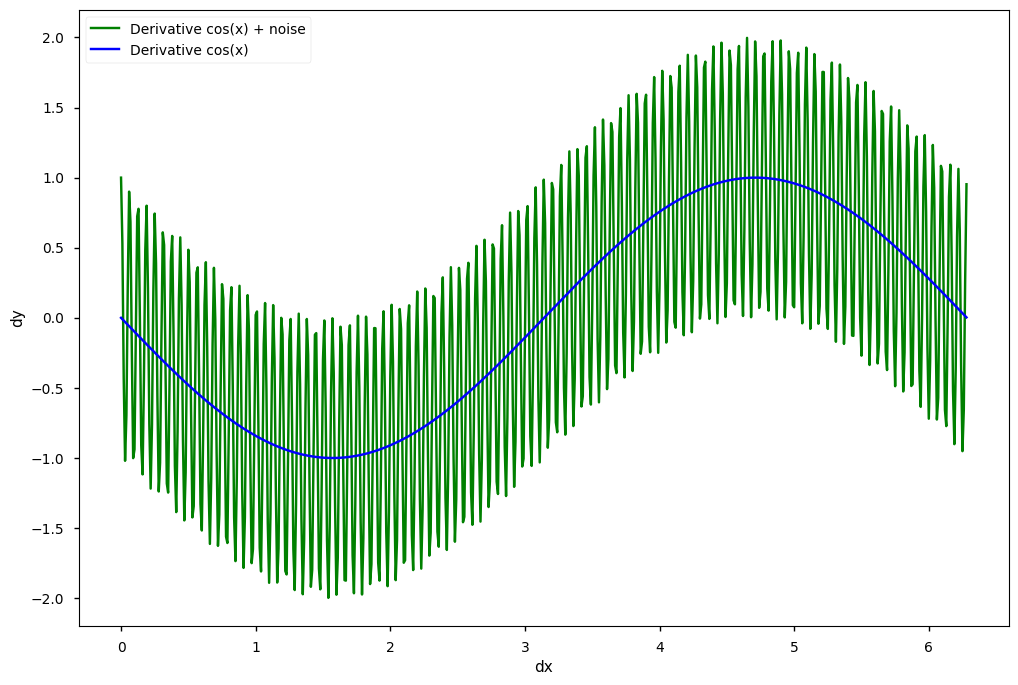

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-notebook")

x = np.arange(0, 2*np.pi, 0.01)

# compute function
omega = 100
epsilon = 0.01
y = -np.sin(x)
y_noise = y + epsilon*omega*np.cos(omega*x)

# plot solution
plt.figure(figsize=(12, 8))
plt.plot(x, y_noise, "g-", label = "Derivative cos(x) + noise")
plt.plot(x, y, "b-", label = "Derivative cos(x)")
plt.xlabel("dx")
plt.ylabel("dy")
plt.legend()
plt.show()


####**20.5 SUMMARY AND PROBLEMS**
#####**20.5.1 SUMMARY**
1. Because explicit derivation of functions is sometimes cumbersome for engineering applications,
numerical approaches are preferable.
2. Numerical approximation of derivatives can be done using a grid on which the derivative is approximated
by ﬁnite differences.
3. Finite differences approximate the derivative by ratios of differences of the function values over
small intervals.
4. Finite difference schemes have different approximation orders depending on the method used.
5. When the data is noisy, there are issues using ﬁnite differences for approximating derivatives.


#####**20.5.2 PROBLEMS**

**1.** Write a function `my_der_calc(f, a, b, N, option)` with the output as `[df, X]`, where `f` is a function object, `a` and `b` are scalars such that `a < b`, `N` is an integer bigger than 10, and `option` is the string `"forward"`, `"backward"` or `"central"`. Let `x` be an array starting at `a`, ending at `b`, containing `N` evenly spaced elements, and let `y` be the array `f(x)`. The output argument, `df`, should be the numerical derivatives computed for `x` and `y` according to the method defined by the input argument, `option`. The output argument `X` should be an array the same size as `df`, containing the points in `x` for which `df` is valid. Specifically, the forward difference method "loses" the last point, the backward difference method loses the first point, and the central difference method loses the first and last points.




In [ ]:
x = np.linspace(1, 10, 20)
h = x[1] - x[0]
f = lambda x: x
y = f(x)

y[1:] - y[:-1]

array([0.47368421, 0.47368421, 0.47368421, 0.47368421, 0.47368421,
       0.47368421, 0.47368421, 0.47368421, 0.47368421, 0.47368421,
       0.47368421, 0.47368421, 0.47368421, 0.47368421, 0.47368421,
       0.47368421, 0.47368421, 0.47368421, 0.47368421])

In [ ]:
import numpy as np
def my_der_calc(f, a, b, N, option):
  """
  Numerical derivative calculator function
  """
  # define grid
  x = np.linspace(a, b, N)
  h = x[1] - x[0]
  # compute function
  y = f(x)

  # create conditionals depending on "option"
  if option == "forward":
    df = (y[1:] - y[:-1])/h
    X = x[:-1]
  elif option == "backward":
    df = (y[1:] - y[:-1])/h
    X = x[1:]
  elif option == "central":
      df = (y[2:] - y[:-2])/(2*h)
      X = x[1:-1]
  else:
    raise ValueError("option must be 'forward', 'backward', or 'central'")

  df = df.astype(float).tolist()
  X = X.astype(float).tolist()
  return [df, X]


In [ ]:
f = lambda x: x**2
print(my_der_calc(f, 0, 100, 30, "forward"))
print(my_der_calc(f, 0, 100, 30, "backward"))
print(my_der_calc(f, 0, 100, 30, "central"))


[[3.4482758620689653, 10.344827586206895, 17.241379310344833, 24.13793103448275, 31.034482758620687, 37.93103448275863, 44.827586206896555, 51.72413793103445, 58.6206896551724, 65.51724137931035, 72.41379310344833, 79.31034482758622, 86.20689655172403, 93.10344827586218, 99.9999999999998, 106.896551724138, 113.79310344827596, 120.68965517241364, 127.58620689655146, 134.48275862068994, 141.3793103448275, 148.27586206896584, 155.17241379310337, 162.06896551724148, 168.96551724137876, 175.86206896551738, 182.75862068965517, 189.65517241379354, 196.55172413793107], [0.0, 3.4482758620689653, 6.896551724137931, 10.344827586206897, 13.793103448275861, 17.241379310344826, 20.689655172413794, 24.137931034482758, 27.586206896551722, 31.034482758620687, 34.48275862068965, 37.93103448275862, 41.37931034482759, 44.82758620689655, 48.275862068965516, 51.72413793103448, 55.172413793103445, 58.62068965517241, 62.068965517241374, 65.51724137931033, 68.9655172413793, 72.41379310344827, 75.86206896551724

**2.** Write a function `my_num_diff(f, a, b, n, option)` with the output as `[df, X]`, where `f` is a function object. The function `my_num_diff` should compute the derivative of `f` numerically for `n` evenly spaced points starting at `a` and ending at `b`, according to the method defined by `option`. The input argument `option` is one of the following strings: `"forward"`, `"backward"`, and `"central"`. Note that for the forward and backward method, the output argument, `dy`, should be a 1D array of length $n-1$, and for the central difference method `dy` should be a 1D array of length $n-2$. The function should also output a vector `X` that is the same size as `dy` and denotes the $x$-valuesfor which `dy` is valid.

**3.** Write a function `my_num_diff_w_smoothing(x, y, n)` with output `[dy, X]`, where `x` and `y` are a 1D `NumPy`array of the same length, ad `n` is a strictly positive scalar. The function should first create a vector of "smoothed" `y` data points where `y_smooth[i] = np.mean(y[i-n:i+n])`. The function should then compute `dy`, the derivative of the smoothed $y$-vector, using the central difference method. The function should also output a 1D array `X` that is the same size as `dy` and denotes the $x$- values for which `dy` is valid.

Assume that the data contained in `x` is in ascending order with no duplicate entries; it is possible that the elements of `x` will not be evenly spaced. Note that the output `dy` will have $2n + 2$ fewer points than `y`. Assume that the length if `y` is much bigger than $2n + 2$.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-notebook")
n = 100
x = np.linspace(0, 2*np.pi, n)
y = np.sin(x) + np.random.randn(len(x))/100
for i in range(len(y)):
  y_smooth = np.mean(y[i-n:i+n])
  #print(y_smooth)


In [ ]:
n = 10
x = np.linspace(0, 2*np.pi, 10)
y = np.sin(x) + np.random.randn(len(x))/10
h = (np.sum(x[1:] - x[:-1]))/len(x)
# smoothed function
# empty array to store the smoothed version of y
y_smooth = []
for i in range(n):
  y_smooth.append(np.mean(y[i-n:i+n]))
print(np.array(y_smooth, dtype = float).tolist())
print(len(y_smooth))

[-0.03501717534406762, -0.02403878023911215, -0.10124865624856089, -0.2618302023912246, -0.41303412265366934, -0.5678138780483473, -0.6192221210573294, -0.587821434570556, -0.38576424791216063, -0.04668554412742865]
10


In [ ]:
print(x[1] - x[0])
print(h)

0.6981317007977318
0.6283185307179586


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-notebook")

def my_num_diff_w_smoothing(x, y, n):
  """
  Computes the numerical derivative of a smoothed function using the central difference method.

  Args:
    x: A 1D NumPy array of x-values.
    y: A 1D NumPy array of y-values of the same length as x.
    n: A strictly positive scalar for smoothing.

  Returns:
    A list containing:
      - dy: A 1D NumPy array of the numerical derivative of the smoothed y-vector.
      - X: A 1D NumPy array of x-values for which dy is valid.
  """
  # compute h as the average distance between x_i and x_i+1
  h = np.mean(x[1:] - x[:-1])
  # smoothed function
  # empty array to store the smoothed version of y
  y_smooth = []
  for i in range(len(y)):
    # Ensure indices are within bounds
    start_index = max(0, i - n)
    end_index = min(len(y), i + n + 1)
    y_smooth.append(np.mean(y[start_index:end_index]))
  y_smooth = np.array(y_smooth)

  # numerical derivative of y with central difference
  dy = (y_smooth[2:] - y_smooth[:-2])/(2*h)
  X = x[n+1:-(n+1)]


  return [dy, X]

In [ ]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x) + np.random.randn(len(x))/100
print(x.shape)
print(y.shape)


(100,)
(100,)


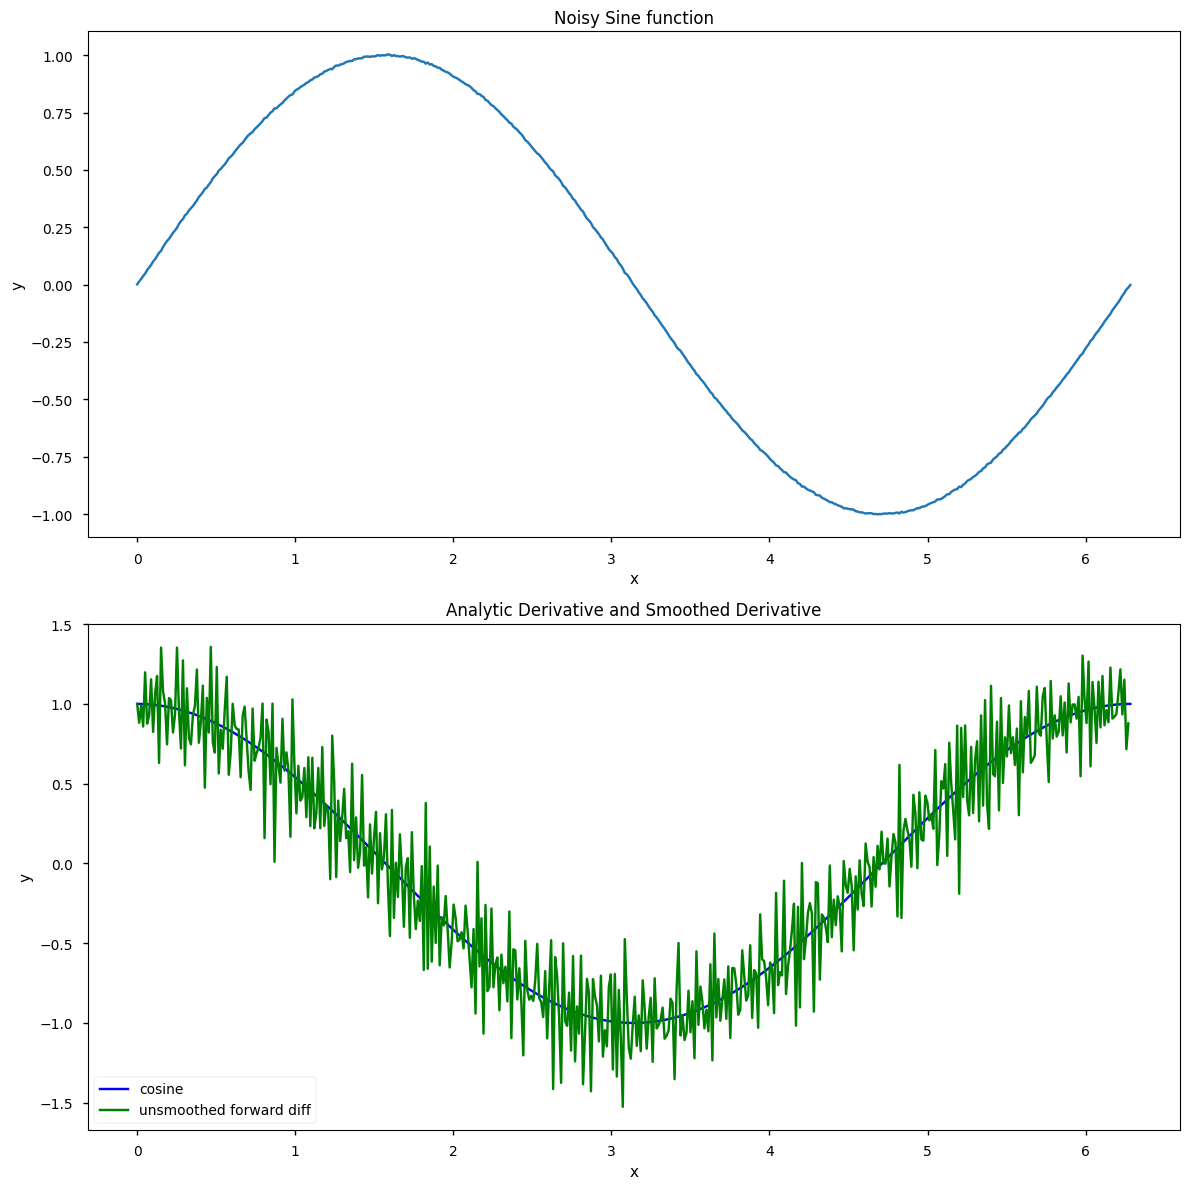

In [ ]:
# Test Case 1
x = np.linspace(0, 2*np.pi, 500)
y = np.sin(x) + np.random.randn(len(x))/500
dy = my_num_diff_w_smoothing(x, y, 4)[0]
X = my_num_diff_w_smoothing(x, y, 4)[1]
plt.figure(figsize = (12, 12))
plt.subplot(2,1,1)
plt.plot(x, y)
plt.title("Noisy Sine function")
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(2,1,2)
plt.plot(x, np.cos(x), "b", label = "cosine")
plt.plot(x[:-1], (y[1:] - y[:-1])/(x[1]-x[0]), "g", \
label = "unsmoothed forward diff")
#plt.plot(X, dy, "r", label = "smoothed")
plt.title("Analytic Derivative and Smoothed Derivative")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
print(X.shape)
print(dy.shape)

(490,)
(495,)
